In [1]:
import pandas as pd
import os
from time import time
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [3]:
path_to_data= "/home/ubuntu/udacity/CodeGladiator/invesco/data"

aum_file = "Code-Gladiators-AUM.csv"


In [4]:
df = pd.read_csv(os.path.join(path_to_data, aum_file))

In [5]:
df.count()

Unique_Advisor_Id       673600
Unique_Investment_Id    673600
Month                   673600
Shares                  673600
AUM                     673600
dtype: int64

In [7]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Unique_Advisor_Id       0
Unique_Investment_Id    0
Month                   0
Shares                  0
AUM                     0
dtype: int64

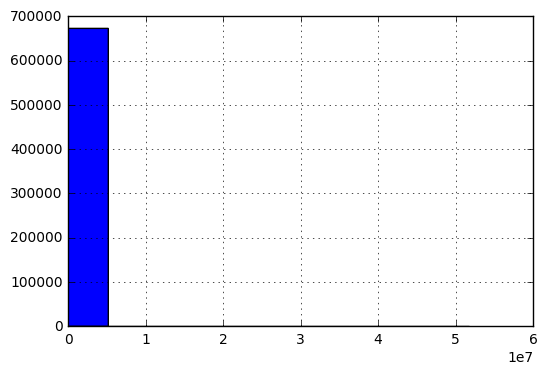

In [11]:
df['AUM'].hist(bins = 10)

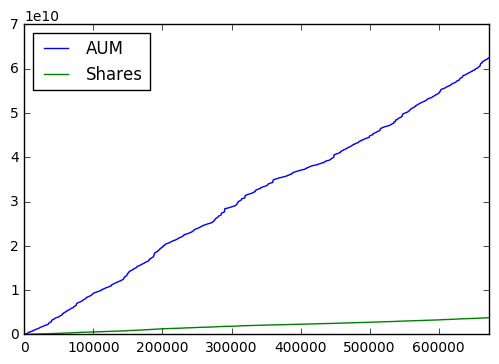

In [12]:
column_list = ['AUM', 'Shares']
df2=df[column_list].cumsum()

plt.figure(); df2[column_list].plot();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3db73a4630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3db888f860>]], dtype=object)

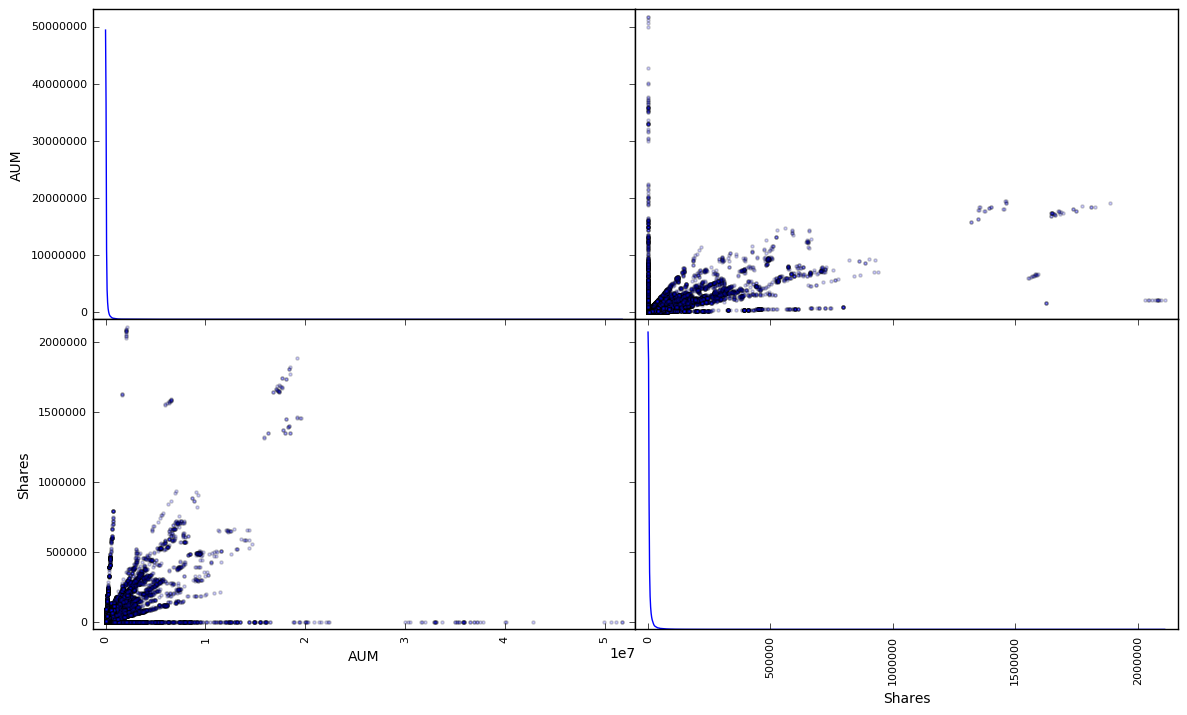

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[column_list], alpha=0.2,figsize = (14,8), diagonal='kde')

In [15]:
df_log = np.log(df[column_list])
df_log.head()

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


,AUM,Shares
0,12.208391,9.362901
1,11.219722,8.363252
2,9.669003,6.755024
3,9.681406,6.755024
4,9.684082,6.755024


In [ ]:
df_log = df[column_list].apply(lambda x : x['AUM']==0 and x['Shares']==0)

In [37]:
df_log = df[df['AUM']!=0 ]

df_log = df_log[df_log['Shares']!=0]

In [38]:

df_log = np.log(df_log[column_list])

In [39]:
df_log.describe()

,AUM,Shares
count,601871.000000,601871.000000
mean,9.869656,7.057970
std,1.851334,1.902452
min,-5.585999,-5.991465
25%,8.757742,5.851949
50%,9.934789,7.104921
75%,11.075207,8.324523
max,16.788535,14.562247


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dabbacb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3db0bf1198>]], dtype=object)

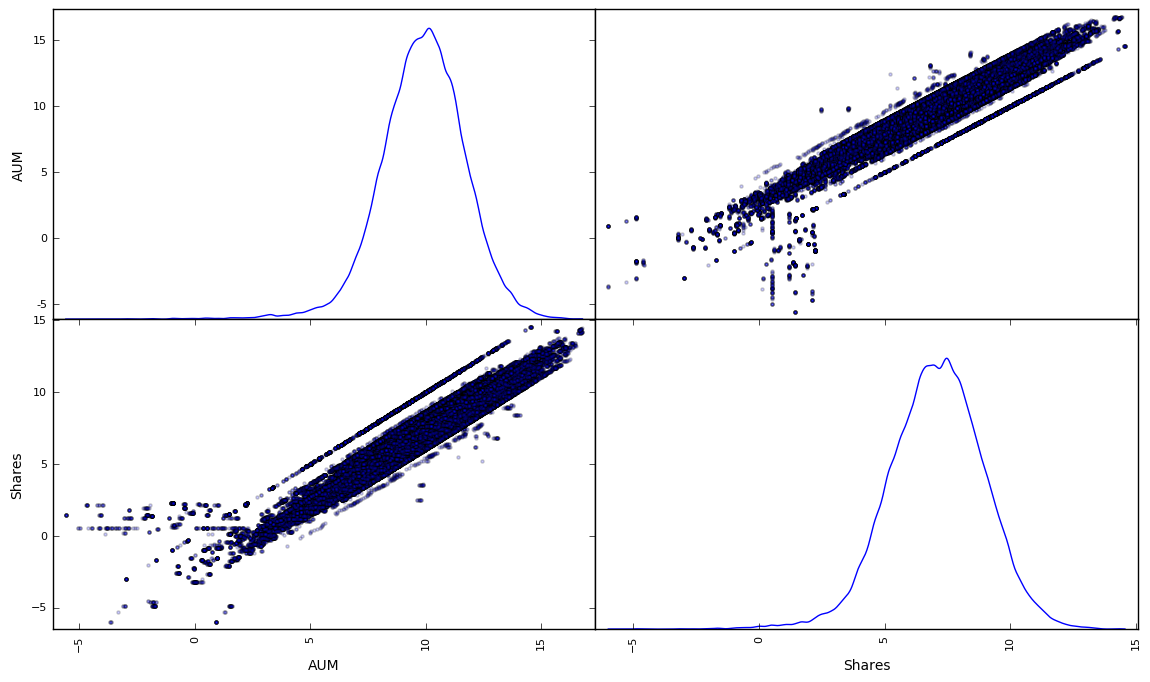

In [40]:
scatter_matrix(df_log, alpha=0.2,figsize = (14,8), diagonal='kde')

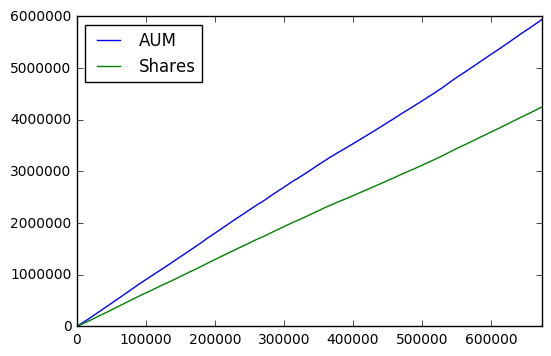

In [41]:
column_list = ['AUM', 'Shares']
df2=df_log.cumsum()

plt.figure(); df2[column_list].plot();